<a href="https://colab.research.google.com/github/kash2023k/Pytorch-Project1/blob/main/Simple_Deep_Learning_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Classifying IRIS Flowers**

In [77]:
import torch #import pytorch library
import torch.nn as nn #Imports nn → used for neural network layers (Linear, Conv, etc.)
import torch.nn.functional as F #Imports F → used for activation functions (ReLU, softmax, etc.)
import numpy as np

In [78]:
# Create a Model Class that inherits the nn.MOdule

class Model(nn.Module): #create a custom neural network by inheriting from nn.Module | Every PyTorch model must inherit from nn.Module.

  # Input Layer (4 feature of the flower) -->
  # Hidden Layer1 (H1) (neurons)--->
  # H2 (Neurons) -->
  # Output (3 classes of irish flowers)

  def __init__(self, in_features=4, h1=8, h2=9, out_features=3): #__init__ defines the layers and structure of the network
    super().__init__() #super().__init__() initializes all PyTorch internals of nn.Module
    self.fc1 = nn.Linear(in_features, h1) #fc1 = fully connected Neurons Layer 1 | Input: 4 features , Output: 8 neurons , Learns: weights + bias
    self.fc2 = nn.Linear(h1, h2) #Fully Connected Layer 2 , Input: 8 neurons , Output: 9 neurons
    self.out = nn.Linear(h2, out_features) #Output Layer, Input: 9 neurons, Output: 3 neurons (3 flower classes), Produces logits (raw scores before softmax)

  def forward(self, x): #This function describes how data flows through the network.
    x = F.relu(self.fc1(x)) #First Hidden Layer , Sends input → fc1, Applies ReLU activation,
    x = F.relu(self.fc2(x)) #Second Hidden Layer , Output of layer 1 → fc2, Again uses ReLU
    x = self.out(x) #Output Layer , No activation → produces logits, (During training, CrossEntropyLoss will apply softmax automatically)
    return x

In [79]:
# Pick a manual seed for randomization
torch.manual_seed(32)
# Create an instance of the model
model = Model()

#What this does

#Sets the random seed for PyTorch.
#Ensures that:
#Model weights
#Random numbers
#Shuffling
#Any process involving randomness …will produce the same result every time you run the code.
# Why this is important
# Makes your experiments reproducible.
# If someone else runs your code with seed 32, they will get the same initial weights and same training pattern.


In [80]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


In [81]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [82]:
# Converting non numeric column to numeric
df['species'] = df['species'].replace('setosa',0.0)
df['species'] = df['species'].replace('versicolor',1.0)
df['species'] = df['species'].replace('virginica',2.0)
df

/tmp/ipython-input-3529577701.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['species'] = df['species'].replace('virginica',2.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [83]:
# Train Test Split

X = df.drop('species', axis=1)
y = df['species']

In [84]:
# Converting above data sets to numpy values

X = X.values
y = y.values

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
# Run the train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 41)

In [87]:
# Convert X features to float tensors as the features are in float
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)

In [88]:
# Convert y labels to tensor long
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [89]:
# Set the Criterion to measure the error , how far off the prediction is from actual data
criterion = nn.CrossEntropyLoss()

# Choose an the Adam optimizer , lr = Learning Rate ( If the error doesn't go down after a bunch of iterations (epochs) , we have to decrease the lr)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # parameters are Input + HL1 + HL2 + Output

In [90]:
# Train the model
# Number of epochs that we want (One run through with all the training data in our network)
epochs = 100
losses = []

for i in range(epochs):
  i+=1
  y_pred = model.forward(X_train)

  # Measuring the loss

  loss = criterion(y_pred, y_train)

  # Keeping a track of the losses
  losses.append(loss.detach().numpy())

  # Print every 10 epochs
  if i%10 == 0:
    print(f'Epoch number: {i} and the loss: {loss}')

  # Apply Back propagation
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()



Epoch number: 10 and the loss: 0.9676095247268677
Epoch number: 20 and the loss: 0.8010720610618591
Epoch number: 30 and the loss: 0.6554067730903625
Epoch number: 40 and the loss: 0.4495324194431305
Epoch number: 50 and the loss: 0.29807135462760925
Epoch number: 60 and the loss: 0.1811087727546692
Epoch number: 70 and the loss: 0.11004075407981873
Epoch number: 80 and the loss: 0.07635040581226349
Epoch number: 90 and the loss: 0.05986194312572479
Epoch number: 100 and the loss: 0.05036910995841026


Text(0.5, 0, 'Epoch')

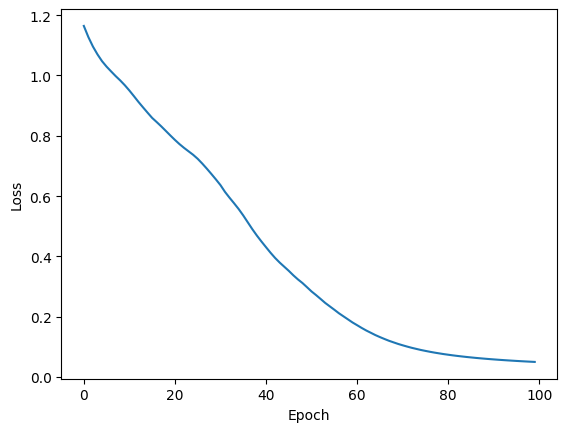

In [91]:
# visualise the loss function

plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [92]:
# Evaluate model on test data
with torch.no_grad(): #Turn off Back Propagation
  y_eval = model.forward(X_test)
  loss = criterion(y_eval, y_test)


In [93]:
loss

tensor(0.1239)

In [96]:
# Lets check the number of corrects and wrongs
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    # It will tell us what kind of iris flower this is
    print(f'{i+1}.) {y_val} -> {y_test[i]}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct += 1

print(f'\n{correct} out of {len(y_test)}) correct')
print(f'Accuracy: {round(correct/len(y_test), 2)}')

1.) tensor([-7.2063,  2.1612,  5.4769]) -> 2
2.) tensor([-9.1754,  1.3635,  7.8524]) -> 2
3.) tensor([-10.2001,   1.7588,   8.6470]) -> 2
4.) tensor([-3.0953,  4.1606, -0.1988]) -> 1
5.) tensor([-8.3845,  2.0174,  6.6467]) -> 2
6.) tensor([-1.5475,  4.3179, -1.9503]) -> 1
7.) tensor([-6.5539,  2.5202,  4.4807]) -> 2
8.) tensor([-2.6112,  4.2436, -0.8124]) -> 1
9.) tensor([-7.2923,  2.3135,  5.3310]) -> 2
10.) tensor([-9.6277,  1.4424,  8.2337]) -> 2
11.) tensor([-5.8210,  2.7769,  3.5191]) -> 2
12.) tensor([  7.1417,   1.4121, -11.7486]) -> 0
13.) tensor([  6.4062,   1.2480, -10.5262]) -> 0
14.) tensor([-0.5721,  3.7056, -2.5105]) -> 1
15.) tensor([  6.1274,   1.6891, -10.5167]) -> 0
16.) tensor([-5.4546,  3.2498,  2.8626]) -> 2
17.) tensor([  6.4498,   1.4771, -10.8144]) -> 0
18.) tensor([-6.4638,  2.5415,  4.3899]) -> 1
19.) tensor([  6.8152,   1.4108, -11.2762]) -> 0
20.) tensor([ 5.1861,  1.5621, -8.9940]) -> 0
21.) tensor([-1.0091,  4.0478, -2.2849]) -> 1
22.) tensor([-9.2123,  1.